#### Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import matplotlib.colors as mcolors
import plotly.graph_objects as go
sns.set_palette("colorblind")


#### Load the Dataset

In [3]:
# 1) Install gdown (if you haven’t already)
!pip install --quiet gdown

import gdown
import pandas as pd

# 2) Build the “uc?id=” download URL
file_id = '1soyX0JkTpi6ZWEAZZ139ad6UqeTOpPLp'
download_url = f'https://drive.google.com/uc?id={file_id}'

# 3) Download to local filename
output = 'data.csv'
gdown.download(download_url, output, quiet=False)

# 4) Read with pandas
bikesData = pd.read_csv(output)

Downloading...
From (original): https://drive.google.com/uc?id=1soyX0JkTpi6ZWEAZZ139ad6UqeTOpPLp
From (redirected): https://drive.google.com/uc?id=1soyX0JkTpi6ZWEAZZ139ad6UqeTOpPLp&confirm=t&uuid=195e4ba4-24ae-4370-8903-0a06bc415db8
To: /content/data.csv
100%|██████████| 3.39G/3.39G [00:30<00:00, 112MB/s]


#### Sample of the dataset

In [4]:
bikesData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


#### Checking the number of rows and columns available

In [5]:
bikesData.shape

(17120977, 13)

#### Attributes present in the dataset

In [6]:
bikesData.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [7]:
bikesData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


#### Exploratory Data Analysis

1. Checking the categories present in 'rideable_type' column

In [8]:
bikesData['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike', 'electric_scooter'],
      dtype=object)

2. Checking the categories present in 'member_casual' column

In [9]:
bikesData['member_casual'].unique()

array(['member', 'casual'], dtype=object)

3. Cleaning and replacing the categorical data

In [10]:
bikesData['member_casual'] = bikesData['member_casual'].replace({'member' :'Member', 'casual':'Casual'})
bikesData['rideable_type'] = bikesData['rideable_type'].replace({'electric_bike':'Electric Bike', 'classic_bike':'Classic Bike', 'docked_bike':'Docked Bike', 'electric_scooter':'Electric Scooter'})

4. Plot to see the number of casual and member riders in normal scale.

<ipython-input-11-b9f4e333e3d1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bikesData['member_casual'].value_counts().index,


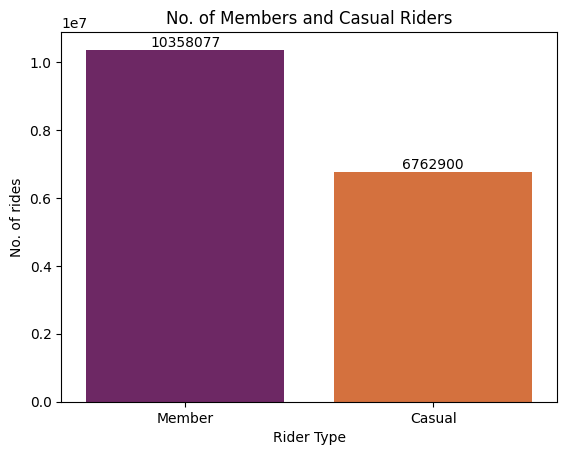

In [11]:
sns.barplot(x=bikesData['member_casual'].value_counts().index,
            y=bikesData['member_casual'].value_counts().values,
           palette = 'inferno')
plt.title('No. of Members and Casual Riders')
plt.xlabel('Rider Type')
plt.ylabel('No. of rides')
counts = bikesData['member_casual'].value_counts().values
for i, count in enumerate(counts):
    plt.text(i, count, f'{count}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

4.1 Plot to see the number of casual and member riders in log scale.

<ipython-input-12-69f1f18fb25f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bikesData['member_casual'].value_counts().index,


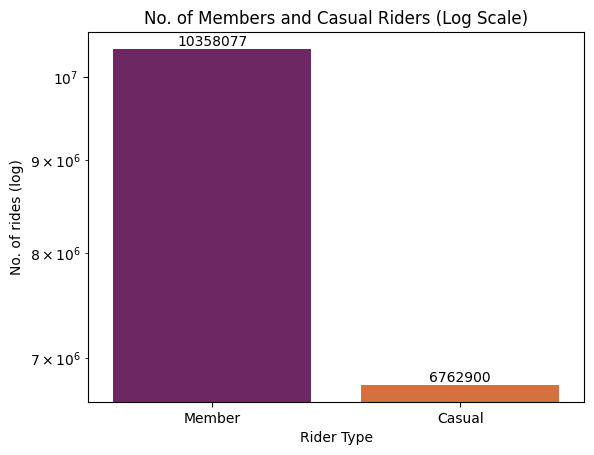

In [12]:
sns.barplot(x=bikesData['member_casual'].value_counts().index,
            y=bikesData['member_casual'].value_counts().values,
           palette = 'inferno')
plt.title('No. of Members and Casual Riders (Log Scale)')
plt.xlabel('Rider Type')
plt.ylabel('No. of rides (log)')
plt.yscale('log')
counts = bikesData['member_casual'].value_counts().values
for i, count in enumerate(counts):
    plt.text(i, count, f'{count}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

5. Rides distribution based on the vehicle type on a normal scale

<ipython-input-13-4adbd21978e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bikesData['rideable_type'].value_counts().index,


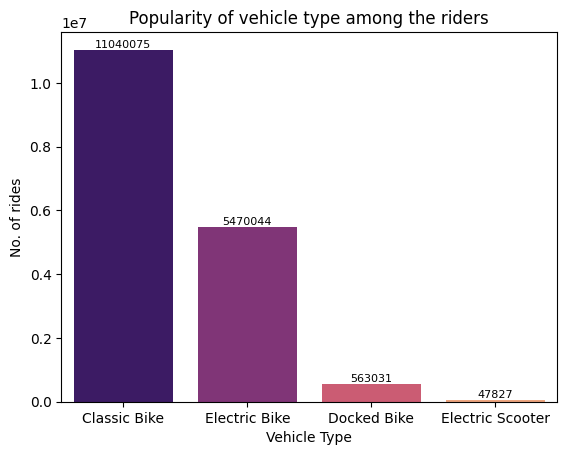

In [13]:
sns.barplot(x=bikesData['rideable_type'].value_counts().index,
            y=bikesData['rideable_type'].value_counts().values,
           palette = 'magma')
plt.title('Popularity of vehicle type among the riders')
plt.xlabel('Vehicle Type')
plt.ylabel('No. of rides')
for index, value in enumerate(bikesData['rideable_type'].value_counts().values):
    plt.text(index, value + 1000,
             str(value),
             ha='center',
             va='bottom',
             fontsize=8)
plt.show()

5.1 Rides distribution based on the vehicle type on a log scale

<ipython-input-14-a08f9e9021a9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bikesData['rideable_type'].value_counts().index,


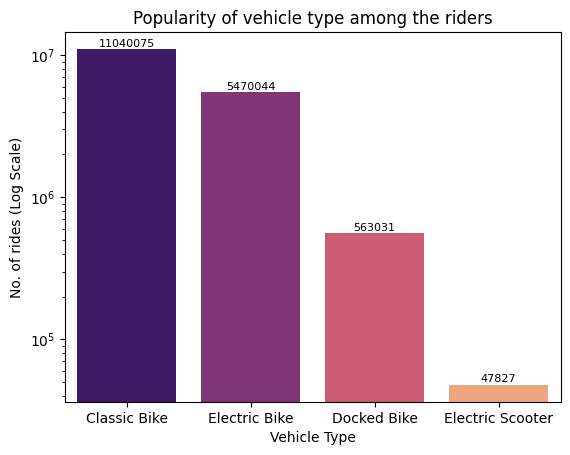

In [14]:
sns.barplot(x=bikesData['rideable_type'].value_counts().index,
            y=bikesData['rideable_type'].value_counts().values,
           palette = 'magma')
plt.title('Popularity of vehicle type among the riders')
plt.xlabel('Vehicle Type')
plt.ylabel('No. of rides (Log Scale)')
plt.yscale('log')
for index, value in enumerate(bikesData['rideable_type'].value_counts().values):
    plt.text(index, value + 1000,
             str(value),
             ha='center',
             va='bottom',
             fontsize=8)
plt.show()

6. Checking the number of start and ending stations

In [15]:
bikesData['end_station_id'].unique().shape[0]

1794

In [16]:
bikesData['start_station_id'].unique().shape[0]

1786

7. Checking the data for null values

In [17]:
bikesData.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,0
start_station_id,0
end_station_name,0
end_station_id,0
start_lat,0
start_lng,0


### Data Preprocessing

Remove rows having no start and end time details

In [18]:
bikesData['started_at'] = pd.to_datetime(bikesData['started_at'], errors='coerce')
bikesData['ended_at'] = pd.to_datetime(bikesData['ended_at'], errors='coerce')

Create new time based attributes helpful for time series analysis

In [19]:
bikesData['ride_duration'] = (bikesData['ended_at'] - bikesData['started_at']).dt.total_seconds() / 60  # ride duration in minutes
bikesData['day_of_week'] = bikesData['started_at'].dt.day_name()  # Day of the week
bikesData['month'] = bikesData['started_at'].dt.month #Month
bikesData['year'] = bikesData['started_at'].dt.year #Year
bikesData['month_name'] = bikesData['started_at'].dt.month_name()  # Month name
bikesData['hour'] = bikesData['started_at'].dt.hour  # Hour of the day

Drop rows with missing start/end locations or invalid duration

In [20]:
bikesData = bikesData.dropna(subset=['start_station_name', 'end_station_name'])

Remove rides with 0 ride duration

In [21]:
bikesData = bikesData[bikesData['ride_duration'] > 0]

Define a function to divide the hours of the based into 4 different times of the day: morning, afternoon, evening and noon

In [22]:

def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


bikesData['time_of_day'] = bikesData['hour'].apply(get_time_of_day)

In [23]:
bikesData.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,day_of_week,month,year,month_name,hour,time_of_day
0,F96D5A74A3E41399,Electric Bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,Member,10.850000,Saturday,1.0,2023.0,January,20.0,Evening
1,13CB7EB698CEDB88,Classic Bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,Member,8.483333,Tuesday,1.0,2023.0,January,15.0,Afternoon
2,BD88A2E670661CE5,Electric Bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,Casual,13.233333,Monday,1.0,2023.0,January,7.0,Morning
3,C90792D034FED968,Classic Bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,Member,8.766667,Sunday,1.0,2023.0,January,10.0,Morning
4,3397017529188E8A,Classic Bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,Member,15.316667,Thursday,1.0,2023.0,January,13.0,Afternoon


In [24]:
viridis_colors = plt.cm.viridis(range(256))
viridis_colors_hex = [mcolors.rgb2hex(color) for color in viridis_colors]

### Analysis

#### 1. Visualizing divvy bike usage over time

1.1 Ridership over the past years

In [25]:
rides_by_year = bikesData.groupby('year').size().reset_index(name='ride_count')

fig = px.line(rides_by_year,
              x='year',
              y='ride_count',
              title='Total Rides by Year in Chicago (Jan 2021- Oct 2024)',
              labels={'ride_count': 'Number of Rides', 'year': 'Year'},
              markers=True)

fig.update_traces(line_color=viridis_colors_hex[50])

fig.update_layout(
    xaxis_title='Year',
    xaxis=dict(tickmode='linear', dtick=1)
)
fig.show()

In [26]:
import pandas as pd
import plotly.express as px
from plotly.express.colors import sample_colorscale

viridis_colors_hex = sample_colorscale(
    "Viridis",
    [i/255 for i in range(256)]
)

filtered_data = bikesData[bikesData['year'].between(2021, 2023)]

# 2) Group by year and count rides
rides_21_23 = (
    filtered_data
    .groupby('year')
    .size()
    .reset_index(name='ride_count')
)

# 3) Plot
fig = px.line(
    rides_21_23,
    x='year',
    y='ride_count',
    title='Total Rides by Year in Chicago (2021–2023)',
    labels={'ride_count': 'Number of Rides', 'year': 'Year'},
    markers=True
)

# 4) Style
fig.update_traces(line_color=viridis_colors_hex[50])
fig.update_layout(
    xaxis_title='Year',
    xaxis=dict(tickmode='linear', dtick=1)
)

# 5) Show
fig.show()


1.2 Distribution of rides over a month

In [27]:
import pandas as pd
import plotly.express as px

# 1) Compute rides by month
rides_by_month = (
    bikesData
    .groupby(['month', 'month_name'])
    .size()
    .reset_index(name='ride_count')
)

# 2) Enforce calendar order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
rides_by_month['month_name'] = pd.Categorical(
    rides_by_month['month_name'],
    categories=month_order,
    ordered=True
)

# 3) Pick Plotly’s default qualitative palette
colors = px.colors.qualitative.Plotly

# 4) Build the bubble chart
fig = px.scatter(
    rides_by_month,
    x='month_name',
    y='ride_count',
    size='ride_count',
    color='month_name',
    color_discrete_sequence=colors,
    category_orders={'month_name': month_order},
    title='Seasonal Variations in Monthly Rides (2021–2024)',
    labels={'month_name': 'Month', 'ride_count': 'Number of Rides'},
    size_max=40
)

# 5) Style the layout
fig.update_layout(
    title_x=0.5,
    title_y=0.90,
    width=1100,
    height=600,
    legend_title_text='Month'
)

# 6) Optionally soften marker borders & opacity
fig.update_traces(
    marker=dict(line=dict(width=1, color='DarkSlateGrey'), opacity=0.8)
)

fig.show()


1.3 Seasonal variations in number of rides

In [28]:
import pandas as pd
import plotly.express as px

# 1) Prepare the data
bikesData['started_at'] = pd.to_datetime(bikesData['started_at'])
bikesData['month'] = bikesData['started_at'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

bikesData['season'] = bikesData['month'].apply(get_season)

seasonal_counts = (
    bikesData['season']
    .value_counts()
    .rename_axis('season')
    .reset_index(name='ride_count')
)

# 2) Define the exact colors from your legend
color_sequence = ['#636EFA',  # Summer (blue)
                  '#EF553B',  # Spring (red)
                  '#00CC96',  # Fall   (green)
                  '#AB63FA']  # Winter (purple)

# 3) Create the rose chart
fig = px.bar_polar(
    seasonal_counts,
    r='ride_count',
    theta='season',
    color='season',
    category_orders={'season': ['Summer', 'Spring', 'Fall', 'Winter']},
    color_discrete_sequence=color_sequence,
    title='Seasonal Ride Patterns (Rose Chart)'
)

# 4) Tweak layout to start at 12 o'clock and go clockwise
fig.update_layout(
    polar=dict(
        angularaxis=dict(rotation=90, direction='clockwise'),
        radialaxis=dict(tickformat=',')
    )
)

fig.show()


1.4 Traffic Analysis based on the hour of the day

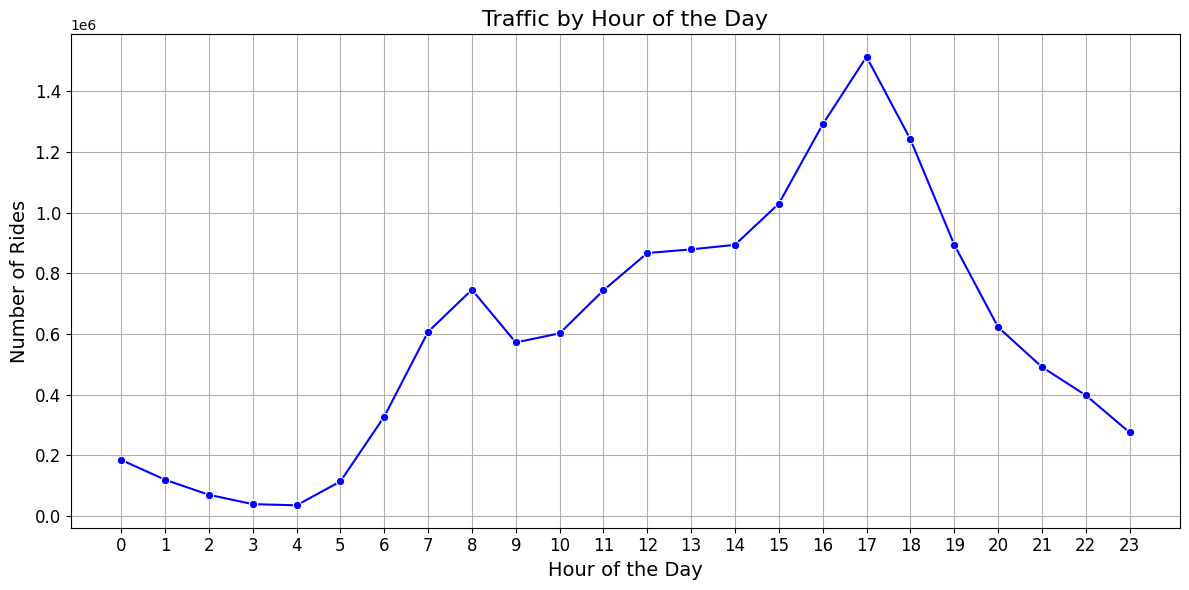

In [29]:
hourly_counts = bikesData.groupby('hour').size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_counts, x='hour', y='count', marker='o', color='b')

plt.title('Traffic by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


### 2. Difference in the bikes usage by member vs casual riders

2.1 Number of member vs causal divvy bike users

In [30]:
import pandas as pd
import plotly.express as px

# 1) Compute rides by rider type
bike_usage_by_rider = (
    bikesData
    .groupby('member_casual')
    .size()
    .reset_index(name='ride_count')
)

# 2) Create a donut chart
fig = px.pie(
    bike_usage_by_rider,
    names='member_casual',
    values='ride_count',
    hole=0.4,
    title='Bike Type Usage by Member vs Casual Riders',
    color='member_casual',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# 3) Put labels and percentages inside the donut
fig.update_traces(
    textposition='inside',
    textinfo='label+percent'
)

# 4) Center the title
fig.update_layout(
    title_x=0.5
)

fig.show()

2.2 Compare usage of bikes by different types of riders.

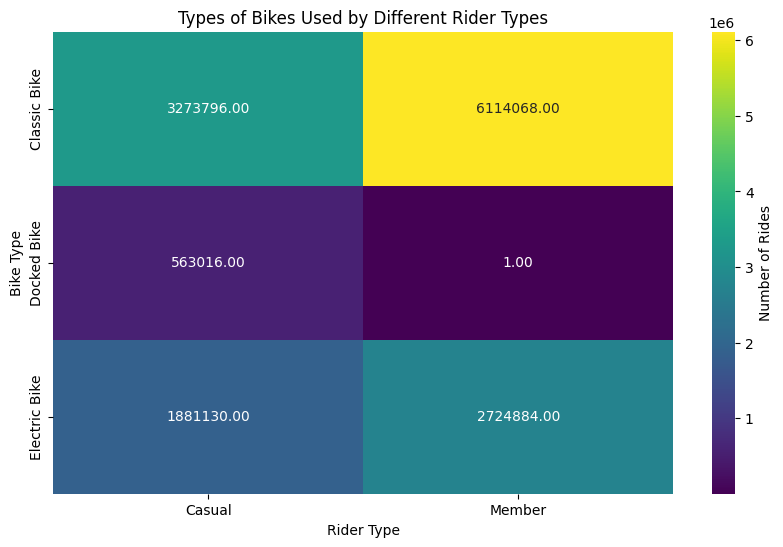

In [31]:
heatmap_data = bikesData.groupby(['rideable_type', 'member_casual']).size().reset_index(name='ride_count')
heatmap_data_pivot = heatmap_data.pivot(index='rideable_type', columns='member_casual', values='ride_count')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_pivot, annot=True, cmap="viridis", fmt='.2f', cbar_kws={'label': 'Number of Rides'})
plt.title('Types of Bikes Used by Different Rider Types')
plt.xlabel('Rider Type')
plt.ylabel('Bike Type')
plt.show()

2.3 Week day analysis

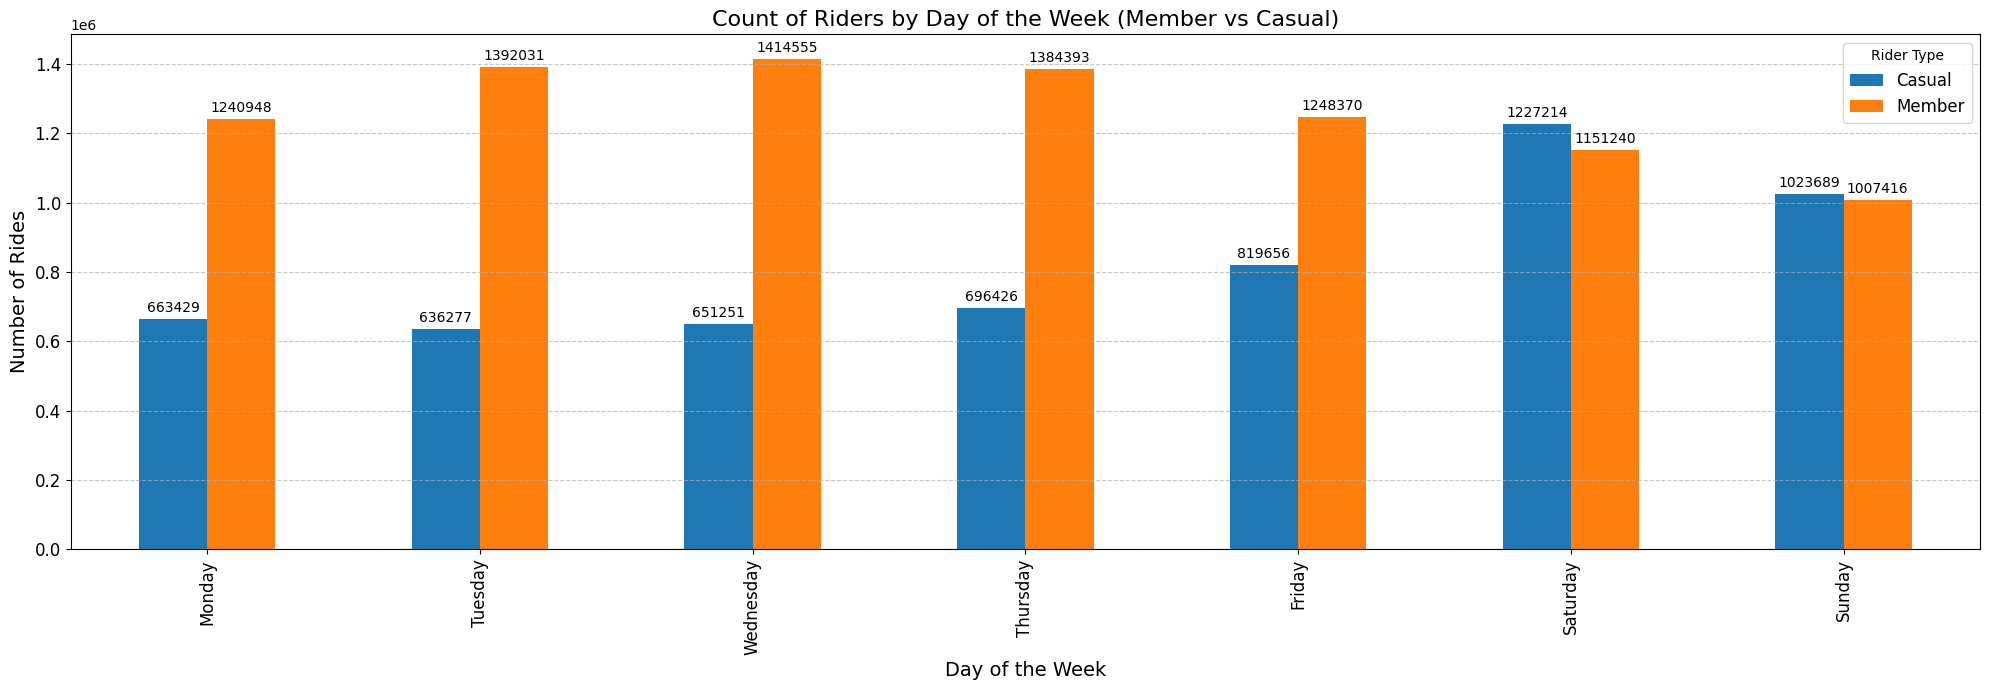

In [32]:
counts = bikesData.groupby(['day_of_week', 'member_casual']).size().reset_index(name='count')

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
counts['day_of_week'] = pd.Categorical(counts['day_of_week'], categories=days_order, ordered=True)
counts = counts.sort_values('day_of_week')

pivot_data = counts.pivot(index='day_of_week', columns='member_casual', values='count')

ax = pivot_data.plot(kind='bar', figsize=(20, 7), color=['#1f77b4', '#ff7f0e'])
plt.title('Count of Riders by Day of the Week (Member vs Casual)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Rider Type', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

2.4 Monthly

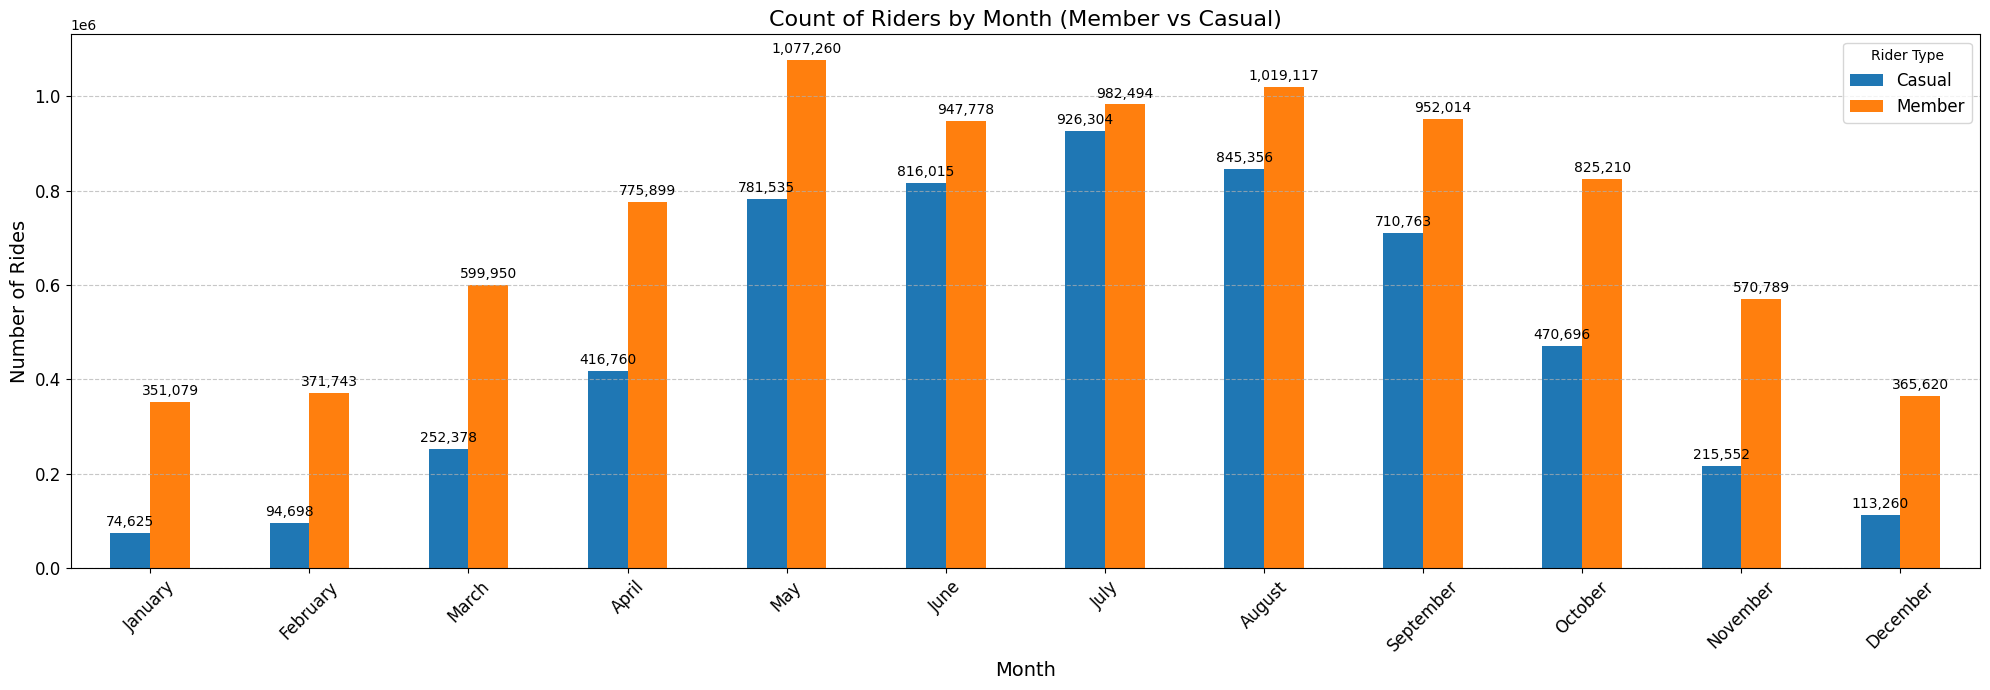

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Ensure you have month names
bikesData['started_at'] = pd.to_datetime(bikesData['started_at'])
bikesData['month_name'] = bikesData['started_at'].dt.month_name()

# 2) Compute counts by month and rider type
counts_month = (
    bikesData
    .groupby(['month_name', 'member_casual'])
    .size()
    .reset_index(name='count')
)

# 3) Enforce calendar order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
counts_month['month_name'] = pd.Categorical(
    counts_month['month_name'],
    categories=month_order,
    ordered=True
)
counts_month = counts_month.sort_values('month_name')

# 4) Pivot for grouped bar chart
pivot_month = counts_month.pivot(
    index='month_name',
    columns='member_casual',
    values='count'
)

# 5) Plot
ax = pivot_month.plot(
    kind='bar',
    figsize=(20, 7),
    color=['#1f77b4', '#ff7f0e']  # blue for casual, orange for member
)

# 6) Titles & labels
plt.title('Count of Riders by Month (Member vs Casual)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Rider Type', fontsize=12)

# 7) Annotate bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline',
        fontsize=10, color='black',
        xytext=(0, 5), textcoords='offset points'
    )

# 8) Grid & layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3. Ride Duration Analysis

3.1 Variation in the average ride duration over the past four years

In [34]:
avg_ride_duration_per_year = bikesData.groupby('year')['ride_duration'].mean().reset_index()
avg_ride_duration_per_year['year']=avg_ride_duration_per_year['year'].astype('str')
avg_ride_duration_per_year

,year,ride_duration
0,2021.0,21.811925
1,2022.0,17.096774
2,2023.0,15.954268
3,2024.0,15.874831


In [35]:
avg_ride_duration_per_month = bikesData.groupby('month_name')['ride_duration'].mean().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_ride_duration_per_month['month_name'] = pd.Categorical(avg_ride_duration_per_month['month_name'], categories=month_order, ordered=True)
avg_ride_duration_per_month = avg_ride_duration_per_month.sort_values('month_name')
avg_ride_duration_per_month

,month_name,ride_duration
4,January,12.372424
3,February,13.618953
7,March,16.415485
0,April,17.982773
8,May,20.408319
6,June,21.086141
5,July,20.752564
1,August,18.942007
11,September,17.969749
10,October,15.884842


3.2 Factors affecting the ride duration

<ipython-input-36-d19ad0340751>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




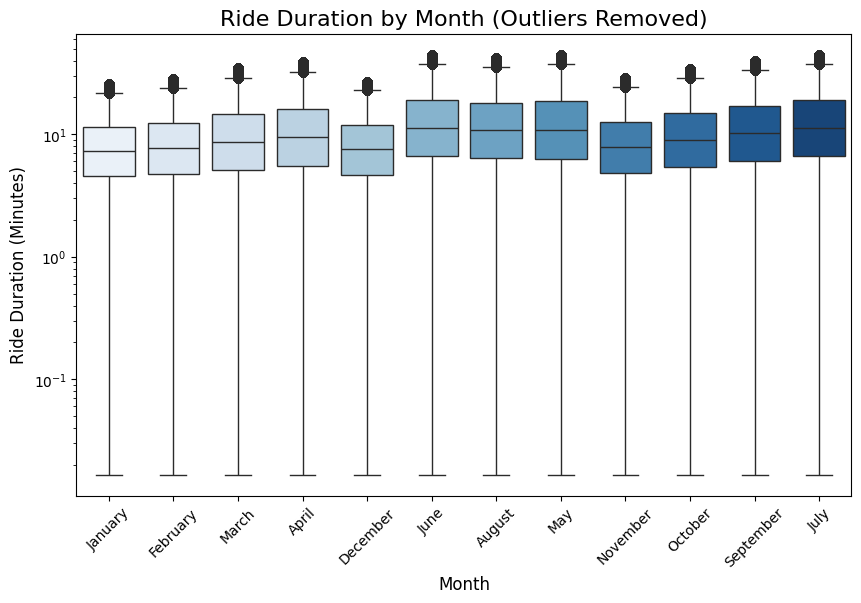

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Q1 = bikesData.groupby('month_name')['ride_duration'].quantile(0.25)
Q3 = bikesData.groupby('month_name')['ride_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_bikesData = bikesData[
    (bikesData['ride_duration'] >= bikesData['month_name'].map(lower_bound)) &
    (bikesData['ride_duration'] <= bikesData['month_name'].map(upper_bound))
]

plt.figure(figsize=(10, 6))
sns.boxplot(x='month_name', y='ride_duration', data=filtered_bikesData, palette='Blues')
plt.title('Ride Duration by Month (Outliers Removed)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Ride Duration (Minutes)', fontsize=12)
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()


3.3 Average ride duration by user type

In [37]:
import pandas as pd
import plotly.express as px

# 1) Compute average duration by rider type
avg_member_duration = (
    bikesData
    .groupby('member_casual')['ride_duration']
    .mean()
    .reset_index()
)

# 2) Define blue/red palette for casual vs member
color_map = {
    'casual': '#636EFA',  # blue
    'member': '#EF553B'   # red
}

# 3) Build the bar chart
fig = px.bar(
    avg_member_duration,
    x='member_casual',
    y='ride_duration',
    color='member_casual',
    color_discrete_map=color_map,
    labels={
        'member_casual': 'Member Type',
        'ride_duration': 'Average Ride Duration (minutes)'
    },
    title='Average Ride Duration by Member Type',
    text='ride_duration'
)

# 4) Format text and layout
fig.update_traces(
    texttemplate='%{text:.1f}',
    textposition='outside'
)
fig.update_layout(
    title_x=0.5,
    xaxis_title='Member Type',
    yaxis_title='Average Ride Duration (minutes)',
    yaxis_tickformat=',.1f',
    width=700,
    height=500,
    showlegend=False
)

fig.show()

In [38]:
pivot_table_monthly = bikesData.pivot_table(
    index='member_casual',
    columns='month_name',
    values='ride_duration',
    aggfunc='mean',
    fill_value=0
)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_table_monthly = pivot_table_monthly.reindex(columns=month_order, level=0)
pivot_table_monthly

month_name,January,February,March,April,May,June,July,August,September,October,November,December
member_casual,,,,,,,,,,,,
Casual,19.405201,22.364027,27.683182,28.412370,30.116573,29.798122,28.394545,25.715116,24.874189,23.071134,19.161068,19.370966
Member,10.877544,11.391228,11.675558,12.380706,13.365136,13.585326,13.547638,13.323723,12.814971,11.785814,10.949072,10.553073


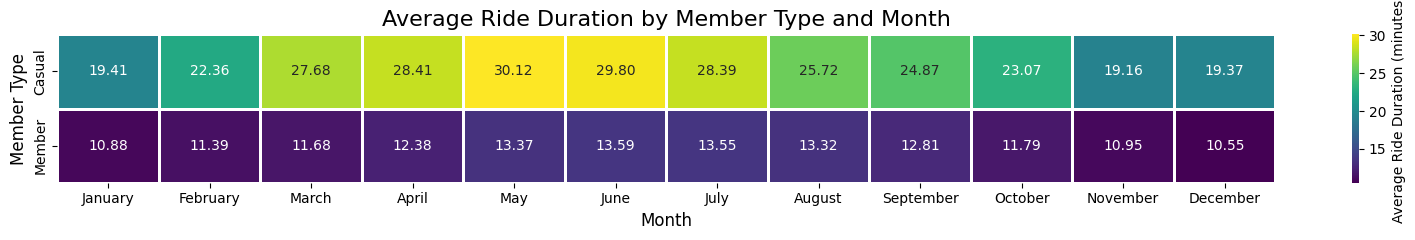

In [39]:
plt.figure(figsize=(16, 2.5))
sns.heatmap(pivot_table_monthly, annot=True, cmap="viridis", fmt='.2f', linewidths=0.8, cbar_kws={'label': 'Average Ride Duration (minutes)'})
plt.title('Average Ride Duration by Member Type and Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Member Type', fontsize=12)
plt.tight_layout()
plt.show()

In [40]:
avg_ride_duration = bikesData.groupby(['rideable_type'])['ride_duration'].mean().reset_index()
print(avg_ride_duration)

   rideable_type  ride_duration
0   Classic Bike      17.611717
1    Docked Bike      66.332274
2  Electric Bike      13.314861


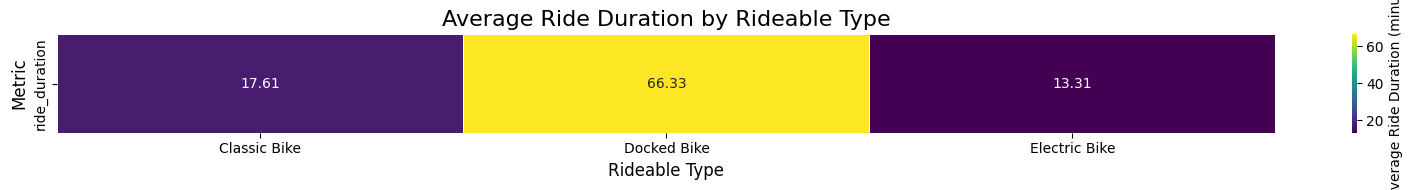

In [41]:
pivot_table = avg_ride_duration.pivot_table(index='rideable_type', values='ride_duration')
plt.figure(figsize=(16, 2))
sns.heatmap(pivot_table.T, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Average Ride Duration (minutes)'})
plt.title('Average Ride Duration by Rideable Type', fontsize=16)
plt.xlabel('Rideable Type', fontsize=12)
plt.ylabel('Metric', fontsize=12)
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import plotly.express as px

# 1) Choose a qualitative color sequence
colors = px.colors.qualitative.Plotly

# 2) Build the bar chart
fig = px.bar(
    avg_ride_duration,
    x='rideable_type',
    y='ride_duration',
    color='rideable_type',
    color_discrete_sequence=colors,
    labels={
        'rideable_type': 'Ride Type',
        'ride_duration': 'Average Ride Duration (minutes)'
    },
    title='Average Ride Duration by Ride Type'
)

# 3) Add value labels on top of each bar
fig.update_traces(
    texttemplate='%{y:.1f}',
    textposition='outside'
)

# 4) Tweak layout
fig.update_layout(
    title_x=0.5,
    xaxis_title='Ride Type',
    yaxis_title='Average Ride Duration (minutes)',
    yaxis_tickformat=',.1f',
    showlegend=False,
    width=700,
    height=500,
    margin=dict(t=80, b=40, l=40, r=40)
)

fig.show()

## 4. Start Locations

4.1 Map showing the density of start locations used by different riders

In [43]:
!pip install folium

In [44]:
import folium
from folium.plugins import HeatMap

In [45]:
ride_counts = bikesData.groupby(['start_station_name', 'start_lat', 'start_lng', 'member_casual']).size().reset_index(name='ride_count')
member_data = ride_counts[ride_counts['member_casual'] == 'Member']
casual_data = ride_counts[ride_counts['member_casual'] == 'Casual']
top_50_member_locations = member_data.nlargest(50, 'ride_count')
top_50_casual_locations = casual_data.nlargest(50, 'ride_count')
map_center = [41.8781, -87.6298]
mymap = folium.Map(location=map_center, zoom_start=12)
heat_data_member = [[row['start_lat'], row['start_lng'], row['ride_count']] for _, row in top_50_member_locations.iterrows()]
heatmap_member = HeatMap(heat_data_member, radius=15, blur=10, name="Members")
heatmap_member.add_to(mymap)
heat_data_casual = [[row['start_lat'], row['start_lng'], row['ride_count']] for _, row in top_50_casual_locations.iterrows()]
heatmap_casual = HeatMap(heat_data_casual, radius=15, blur=10, name="Casual Riders")
heatmap_casual.add_to(mymap)
folium.LayerControl().add_to(mymap)
mymap

4.2 Heatmap showing the ride counts for top 10 stations

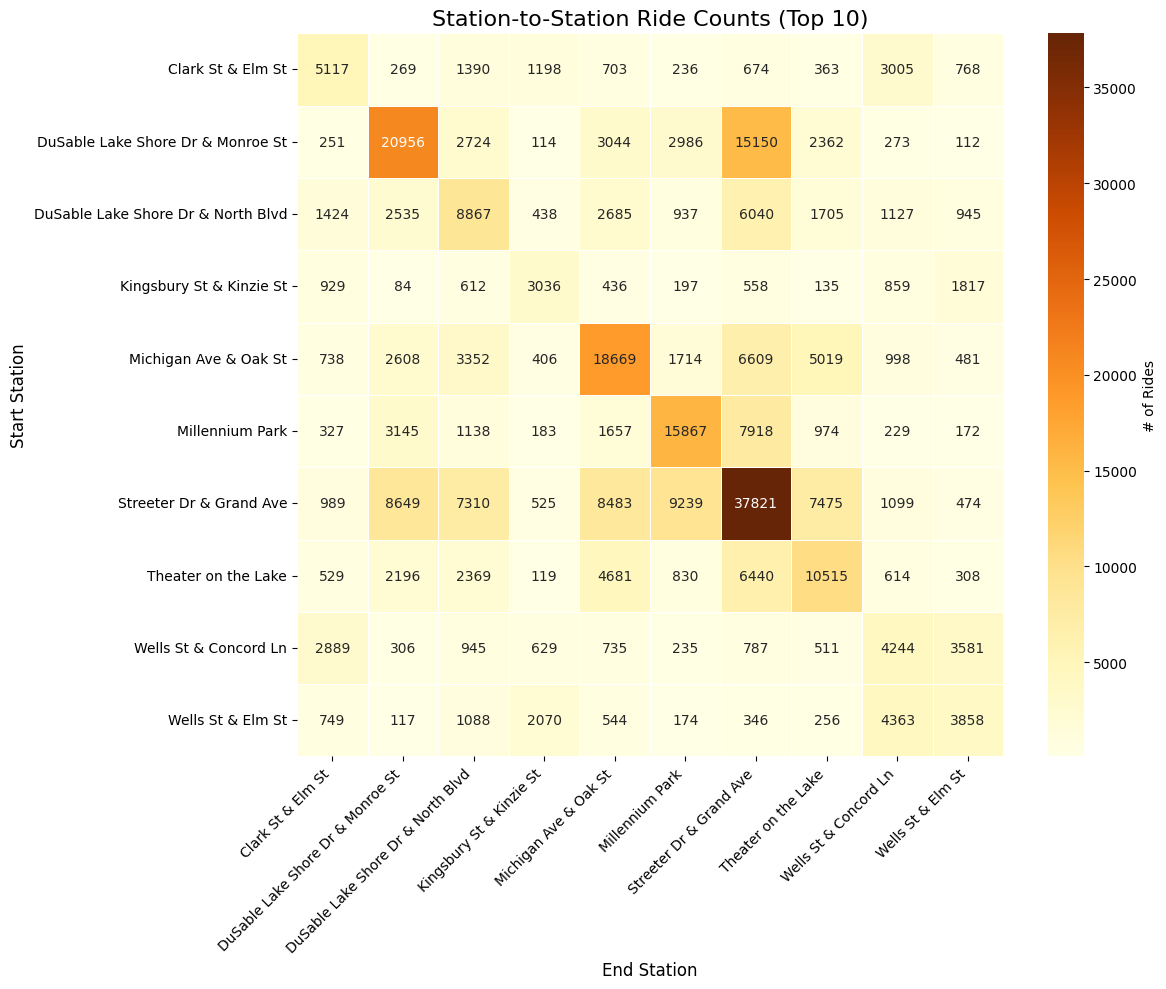

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Identify the top 10 start & end stations
top_start = bikesData['start_station_name'] \
    .value_counts().head(10).index
top_end   = bikesData['end_station_name'] \
    .value_counts().head(10).index

# 2) Filter to only those top stations
subset = bikesData[
    bikesData['start_station_name'].isin(top_start) &
    bikesData['end_station_name'].isin(top_end)
]

# 3) Compute ride counts between each start–end pair
counts = (
    subset
    .groupby(['start_station_name', 'end_station_name'])
    .size()
    .reset_index(name='ride_count')
)

# 4) Pivot into matrix form
pivot = counts.pivot(
    index='start_station_name',
    columns='end_station_name',
    values='ride_count'
).fillna(0).astype(int)

# 5) Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    pivot,
    annot=True,
    fmt='d',
    cmap='YlOrBr',
    linewidths=0.5,
    cbar_kws={'label': '# of Rides'}
)

# 6) Style labels & title
plt.title('Station-to-Station Ride Counts (Top 10)', fontsize=16)
plt.ylabel('Start Station', fontsize=12)
plt.xlabel('End Station', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
